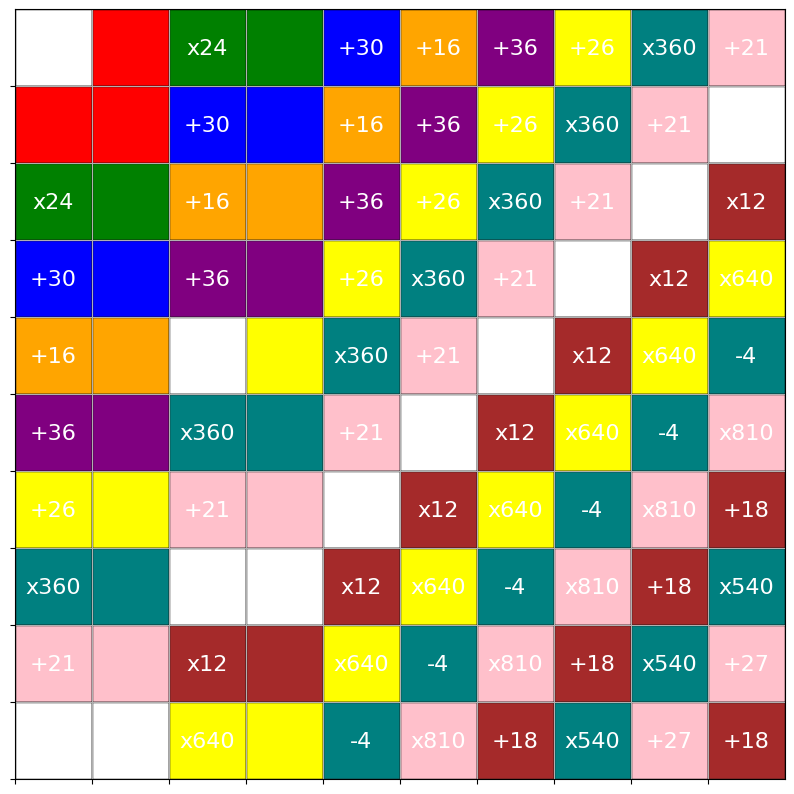

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


size = 6

cages = {
    'A': {'color': 'red', 'label': 'x320', 'operation': 'x'},
    'B': {'color': 'green', 'label': 'x24', 'operation': 'x'},
    'C': {'color': 'blue', 'label': '+30', 'operation': '+'},
    'D': {'color': 'orange', 'label': '+16', 'operation': '+'},
    'E': {'color': 'purple', 'label': '+36', 'operation': '+'},
    'F': {'color': 'yellow', 'label': '+26', 'operation': '+'},
    'G': {'color': 'teal', 'label': 'x360', 'operation': 'x'},
    'H': {'color': 'pink', 'label': '+21', 'operation': '+'},
    'J': {'color': 'brown', 'label': 'x12', 'operation': 'x'},
    'K': {'color': 'yellow', 'label': 'x640', 'operation': 'x'},
    'L': {'color': 'teal', 'label': '-4', 'operation': '-'},
    'M': {'color': 'pink', 'label': 'x810', 'operation': 'x'},
    'N': {'color': 'brown', 'label': '+18', 'operation': '+'},
    'O': {'color': 'teal', 'label': 'x540', 'operation': 'x'},
    'P': {'color': 'pink', 'label': '+27', 'operation': '+'},
    'Q': {'color': 'brown', 'label': '+18', 'operation': '+'},
    'R': {'color': 'yellow', 'label': 'x560', 'operation': 'x'},
    'S': {'color': 'brown', 'label': '+18', 'operation': '+'},
    'T': {'color': 'teal', 'label': 'x540', 'operation': 'x'},
    'U': {'color': 'pink', 'label': '+27', 'operation': '+'},
    'V': {'color': 'brown', 'label': '+18', 'operation': '+'},
    'W': {'color': 'yellow', 'label': 'x560', 'operation': 'x'},
    'X': {'color': 'pink', 'label': '-2', 'operation': '-'},
    'Y': {'color': 'brown', 'label': '+20', 'operation': '+'},
    'Z': {'color': 'yellow', 'label': 'x56', 'operation': 'x'},
    'A1': {'color': 'pink', 'label': '/2', 'operation': '/'},
    'B1': {'color': 'brown', 'label': '+13', 'operation': '+'},
    'C1': {'color': 'yellow', 'label': 'x48', 'operation': 'x'},
    'D1': {'color': 'pink', 'label': 'x126', 'operation': 'x'},
    'E1': {'color': 'brown', 'label': '-5', 'operation': '-'},
    'F1': {'color': 'yellow', 'label': 'x4320', 'operation': 'x'},
}

kenken = [
    ['A', 'A', 'B', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    ['A', 'A', 'C', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    ['B', 'B', 'D', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    ['C', 'C', 'E', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
    ['D', 'D', 'F', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
    ['E', 'E', 'G', 'G', 'H', 'I', 'J', 'K', 'L', 'M'],
    ['F', 'F', 'H', 'H', 'I', 'J', 'K', 'L', 'M', 'N'],
    ['G', 'G', 'I', 'I', 'J', 'K', 'L', 'M', 'N', 'O'],
    ['H', 'H', 'J', 'J', 'K', 'L', 'M', 'N', 'O', 'P'],
    ['I', 'I', 'K', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
]
size=10

fixed_values = {
    (0, 0): 7,
    (4, 2): 6,
    (5, 5): 9,
}

fig, ax = plt.subplots(figsize=(10, 10))  # Establece el tamaño del gráfico

# Dibuja las celdas y añade el color y los valores
for i in range(size):
    for j in range(size):
        if (i, j) not in fixed_values:
            op = cages.get(kenken[i][j], {'color': 'white', 'label': ''})
        else:
            op = {'color': 'white', 'label': ''}

        # Dibuja el rectángulo
        rect = patches.Rectangle((j, size - i - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=op['color'])
        ax.add_patch(rect)

        # Añade el texto correspondiente
        label = op.get('label', '')  # Si la clave 'label' no está presente, usa cadena vacía
        if (i == 0 and j == 0) or (kenken[i][j] != kenken[i-1][j] and kenken[i][j] != kenken[i][j-1]):
            ax.text(j + 0.5, size - i - 0.5, label, ha='center', va='center', color='white', fontsize=16)
        elif (i, j) in fixed_values:
            ax.text(j + 0.5, size - i - 0.5, str(fixed_values[(i, j)]), ha='center', va='center', color='black', fontsize=16)

# Configura el tamaño y las etiquetas de los ejes
ax.set_xlim(0, size)
ax.set_ylim(0, size)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
plt.grid(True)

plt.show()
